In [42]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [43]:
file_path = 'data/California.csv'
df = pd.read_csv(file_path, delimiter=';', encoding='latin1')

df.head()

df.shape

df.dtypes

Country             object
Region              object
DataYear             int64
ClassGrade           int64
Gender              object
                     ...  
Preferred_Status    object
Role_Model_Type     object
Charity_Donation    object
Unnamed: 60         object
Unnamed: 61         object
Length: 62, dtype: object

In [44]:
unique_values = df['Height_cm'].unique()
unique_values

array(['173', '170', '153', '167', '164', '193', '144,8', '176', '166',
       '175', '177', '178', '180', '151', '187,9', '154', '183', '173,7',
       '163', '170,1', '185', '174', nan, '148', '190', '125,27', '162,5',
       '147,7', '179,3', '155', '182', '165', '32', '169', '184', '150',
       '184,1', '171,2', '156', '73', '162,6', '171', '62', '161,54',
       '177,8', '162', '66', '158', '163,5', '143', '160', '168', '170,2',
       '164,5', '60', '170,69', '157,5', '167,6', '182,8', '123', '179',
       '157,4', '150,5', '152,7', '149', '194', '59', '155,7', '185,93',
       '175,2', '172', '152', '168,9', '190,5', '157', '100', '154,9',
       '179,5', '147', '172,7', '63', '155,75', '175,6', '191', '161',
       '167,7', '152,4', '181', '161,5', '134', '146', '173,9', '175,3',
       '169,47', '172,5', '173,74', '170,6', '176,7', '173,3', '52',
       '161,1', '145', '55', '70,5', '65', '188', '163,8', '159', '144',
       '165,1', '64', '27', '138', '201,6', '171,5', '200'

In [45]:
df['Height_cm'] = df['Height_cm'].str.replace(',', '.').astype(float)
df = df[(df['Height_cm'] >= 100) & (df['Height_cm'] <= 250)]
unique_values_cleaned = df['Height_cm'].unique()
unique_values_cleaned

array([173.  , 170.  , 153.  , 167.  , 164.  , 193.  , 144.8 , 176.  ,
       166.  , 175.  , 177.  , 178.  , 180.  , 151.  , 187.9 , 154.  ,
       183.  , 173.7 , 163.  , 170.1 , 185.  , 174.  , 148.  , 190.  ,
       125.27, 162.5 , 147.7 , 179.3 , 155.  , 182.  , 165.  , 169.  ,
       184.  , 150.  , 184.1 , 171.2 , 156.  , 162.6 , 171.  , 161.54,
       177.8 , 162.  , 158.  , 163.5 , 143.  , 160.  , 168.  , 170.2 ,
       164.5 , 170.69, 157.5 , 167.6 , 182.8 , 123.  , 179.  , 157.4 ,
       150.5 , 152.7 , 149.  , 194.  , 155.7 , 185.93, 175.2 , 172.  ,
       152.  , 168.9 , 190.5 , 157.  , 100.  , 154.9 , 179.5 , 147.  ,
       172.7 , 155.75, 175.6 , 191.  , 161.  , 167.7 , 152.4 , 181.  ,
       161.5 , 134.  , 146.  , 173.9 , 175.3 , 169.47, 172.5 , 173.74,
       170.6 , 176.7 , 173.3 , 161.1 , 145.  , 188.  , 163.8 , 159.  ,
       144.  , 165.1 , 138.  , 201.6 , 171.5 , 200.  , 158.5 , 155.4 ,
       110.  , 129.  , 187.  , 186.  , 116.  , 167.64, 164.59, 140.  ,
      

# Problema 1

In [46]:
model = ols('Height_cm ~ C(Gender)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Gender),15467.491706,1.0,117.97932,1.411550e-24
Residual,59258.743307,452.0,NaN,NaN


In [47]:
unique_genders = df['Gender'].unique()
unique_genders

df_clean = df.dropna(subset=['Gender'])
unique_genders_clean = df_clean['Gender'].unique()
unique_genders_clean

array(['Male', 'Female'], dtype=object)

In [48]:
posthoc = pairwise_tukeyhsd(df_clean['Height_cm'], df_clean['Gender'], alpha=0.05)
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Female,Male,11.6739,0.0,9.5618,13.7861,True


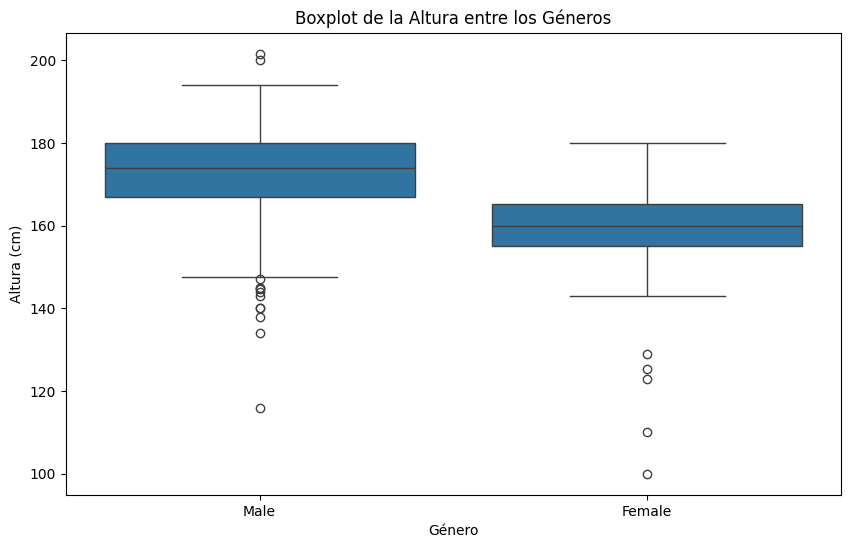

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Height_cm', data=df_clean)
plt.title('Boxplot de la Altura entre los Géneros')
plt.xlabel('Género')
plt.ylabel('Altura (cm)')
plt.show()

In [50]:
# intervalos de confianza para las medias de los grupos de género
conf_intervals = df_clean.groupby('Gender')['Height_cm'].agg(['mean', 'std', 'count']).reset_index()
conf_intervals['ci95_hi'] = conf_intervals['mean'] + 1.96 * conf_intervals['std'] / (conf_intervals['count'] ** 0.5)
conf_intervals['ci95_lo'] = conf_intervals['mean'] - 1.96 * conf_intervals['std'] / (conf_intervals['count'] ** 0.5)
conf_intervals

,Gender,mean,std,count,ci95_hi,ci95_lo
0,Female,159.901491,9.693365,228,161.159730,158.643252
1,Male,171.575398,12.983669,226,173.268173,169.882623


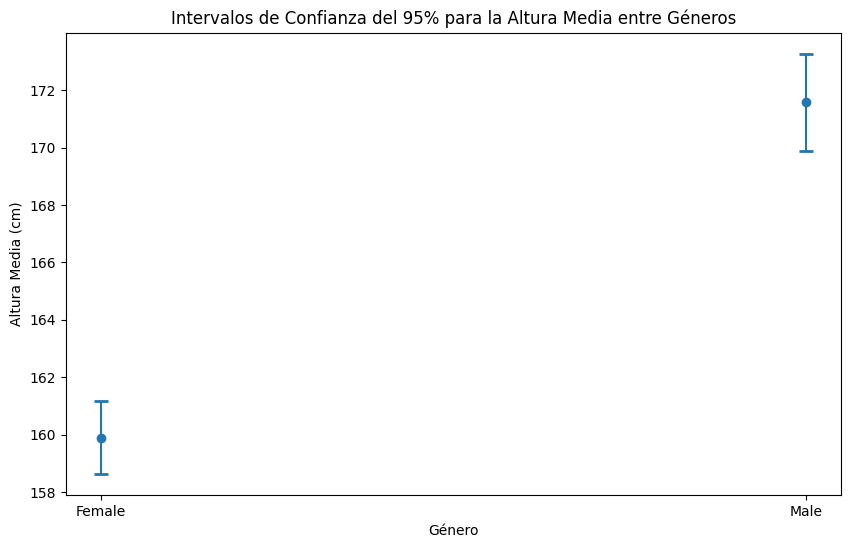

In [51]:
# Intervalos de confianza
plt.figure(figsize=(10, 6))
plt.errorbar(conf_intervals['Gender'], conf_intervals['mean'], 
             yerr=[conf_intervals['mean'] - conf_intervals['ci95_lo'], conf_intervals['ci95_hi'] - conf_intervals['mean']],
             fmt='o', capsize=5, capthick=2, linestyle='None')
plt.title('Intervalos de Confianza del 95% para la Altura Media entre Géneros')
plt.xlabel('Género')
plt.ylabel('Altura Media (cm)')
plt.show()

In [53]:
unique_armspan_values = df_clean['Armspan_cm'].unique()
unique_armspan_values

array(['65', '24', '153,5', '172', '180', nan, '49,9', '176', '167',
       '183', '188', '170,5', '195,7', '177', '60', '160', '96', '180,3',
       '90', '162,5', '72', '30', '7,5', '44,45', '148', '168', '187,9',
       '185', '162', '136', '179', '184', '157', '169', '142', '150',
       '164', '170', '156,5', '161', '156', '154', '147', '146', '141',
       '58', '175', '134', '174', '166', '135', '158', '40', '173', '182',
       '165', '61', '190', '123', '194,4', '186', '157,4', '150,5', '64',
       '145', '191', '178', '165,5', '0,177', '155', '202', '151',
       '121,9', '15', '274,3', '149', '152', '153', '163', '190,5', '111',
       '171', '180,5', '192', '25', '120', '187', '147,3', '132', '16',
       '93', '201', '175,3', '50', '159', '166,4', '71', '122', '56',
       '131', '1520', '193', '137', '142,2', '140', '154,9', '177,8',
       '138', '128', '63', '133', '198', '204,2', '220', '73', '194',
       '100', '80', '75', '143', '103', '152,4', '110', '175,2', '68'

In [54]:
df_clean['Armspan_cm'] = df_clean['Armspan_cm'].str.replace(',', '.').astype(float)

df_clean = df_clean[(df_clean['Armspan_cm'] >= 50) & (df_clean['Armspan_cm'] <= 250)]

unique_armspan_values_cleaned = df_clean['Armspan_cm'].unique()
unique_armspan_values_cleaned

C:\Users\tarea\AppData\Local\Temp\ipykernel_21768\94756096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Armspan_cm'] = df_clean['Armspan_cm'].str.replace(',', '.').astype(float)


array([ 65.  , 153.5 , 172.  , 180.  , 176.  , 167.  , 183.  , 188.  ,
       170.5 , 195.7 , 177.  ,  60.  , 160.  ,  96.  , 180.3 ,  90.  ,
       162.5 ,  72.  , 148.  , 168.  , 187.9 , 185.  , 162.  , 136.  ,
       179.  , 184.  , 157.  , 169.  , 142.  , 150.  , 164.  , 170.  ,
       156.5 , 161.  , 156.  , 154.  , 147.  , 146.  , 141.  ,  58.  ,
       175.  , 134.  , 174.  , 166.  , 135.  , 158.  , 173.  , 182.  ,
       165.  ,  61.  , 190.  , 123.  , 194.4 , 186.  , 157.4 , 150.5 ,
        64.  , 145.  , 191.  , 178.  , 165.5 , 155.  , 202.  , 151.  ,
       121.9 , 149.  , 152.  , 153.  , 163.  , 190.5 , 111.  , 171.  ,
       180.5 , 192.  , 120.  , 187.  , 147.3 , 132.  ,  93.  , 201.  ,
       175.3 ,  50.  , 159.  , 166.4 ,  71.  , 122.  ,  56.  , 131.  ,
       193.  , 137.  , 142.2 , 140.  , 154.9 , 177.8 , 138.  , 128.  ,
        63.  , 133.  , 198.  , 204.2 , 220.  ,  73.  , 194.  , 100.  ,
        80.  ,  75.  , 143.  , 103.  , 152.4 , 110.  , 175.2 ,  68.  ,
      

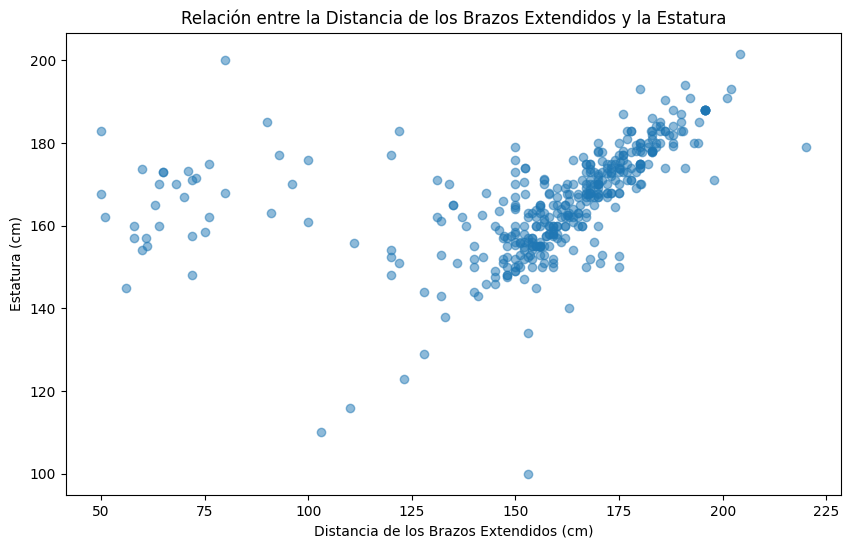

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Armspan_cm'], df_clean['Height_cm'], alpha=0.5)
plt.title('Relación entre la Distancia de los Brazos Extendidos y la Estatura')
plt.xlabel('Distancia de los Brazos Extendidos (cm)')
plt.ylabel('Estatura (cm)')
plt.show()

# Problema 2

In [58]:
unique_armspan = df_clean['Armspan_cm'].unique()
unique_armspan

array([ 65.  , 153.5 , 172.  , 180.  , 176.  , 167.  , 183.  , 188.  ,
       170.5 , 195.7 , 177.  ,  60.  , 160.  ,  96.  , 180.3 ,  90.  ,
       162.5 ,  72.  , 148.  , 168.  , 187.9 , 185.  , 162.  , 136.  ,
       179.  , 184.  , 157.  , 169.  , 142.  , 150.  , 164.  , 170.  ,
       156.5 , 161.  , 156.  , 154.  , 147.  , 146.  , 141.  ,  58.  ,
       175.  , 134.  , 174.  , 166.  , 135.  , 158.  , 173.  , 182.  ,
       165.  ,  61.  , 190.  , 123.  , 194.4 , 186.  , 157.4 , 150.5 ,
        64.  , 145.  , 191.  , 178.  , 165.5 , 155.  , 202.  , 151.  ,
       121.9 , 149.  , 152.  , 153.  , 163.  , 190.5 , 111.  , 171.  ,
       180.5 , 192.  , 120.  , 187.  , 147.3 , 132.  ,  93.  , 201.  ,
       175.3 ,  50.  , 159.  , 166.4 ,  71.  , 122.  ,  56.  , 131.  ,
       193.  , 137.  , 142.2 , 140.  , 154.9 , 177.8 , 138.  , 128.  ,
        63.  , 133.  , 198.  , 204.2 , 220.  ,  73.  , 194.  , 100.  ,
        80.  ,  75.  , 143.  , 103.  , 152.4 , 110.  , 175.2 ,  68.  ,
      

In [59]:
df_clean['Armspan_cm'].dtype

df_clean = df_clean[(df_clean['Armspan_cm'] >= 100) & (df_clean['Armspan_cm'] <= 250)]

unique_armspan_cleaned = df_clean['Armspan_cm'].unique()
unique_armspan_cleaned

array([153.5, 172. , 180. , 176. , 167. , 183. , 188. , 170.5, 195.7,
       177. , 160. , 180.3, 162.5, 148. , 168. , 187.9, 185. , 162. ,
       136. , 179. , 184. , 157. , 169. , 142. , 150. , 164. , 170. ,
       156.5, 161. , 156. , 154. , 147. , 146. , 141. , 175. , 134. ,
       174. , 166. , 135. , 158. , 173. , 182. , 165. , 190. , 123. ,
       194.4, 186. , 157.4, 150.5, 145. , 191. , 178. , 165.5, 155. ,
       202. , 151. , 121.9, 149. , 152. , 153. , 163. , 190.5, 111. ,
       171. , 180.5, 192. , 120. , 187. , 147.3, 132. , 201. , 175.3,
       159. , 166.4, 122. , 131. , 193. , 137. , 142.2, 140. , 154.9,
       177.8, 138. , 128. , 133. , 198. , 204.2, 220. , 194. , 100. ,
       143. , 103. , 152.4, 110. , 175.2, 167.6, 182.8, 149.8, 162.6])

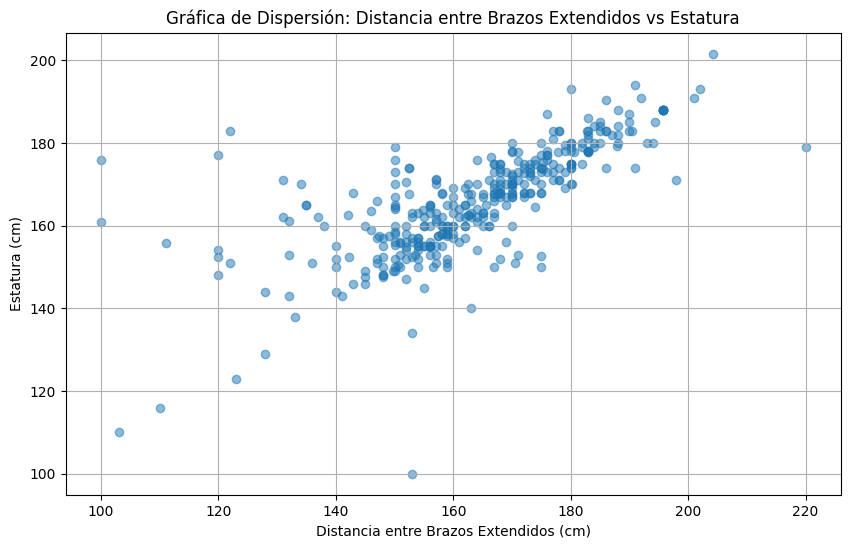

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Armspan_cm'], df_clean['Height_cm'], alpha=0.5)
plt.title('Gráfica de Dispersión: Distancia entre Brazos Extendidos vs Estatura')
plt.xlabel('Distancia entre Brazos Extendidos (cm)')
plt.ylabel('Estatura (cm)')
plt.grid(True)
plt.show()

In [61]:
# Recta de regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['Armspan_cm'], df_clean['Height_cm'])

slope, intercept, r_value**2, p_value

(0.5337420066468934,
 78.62080171054782,
 0.5208753878145644,
 5.802728825719143e-60)

In [62]:
# Pulgadas a cm
armspan_67_inches = 67 * 2.54

# Pronóstico de estatura
height_prediction = slope * armspan_67_inches + intercept
height_prediction


169.45301640171616

In [63]:
# Valor p de la regresión
significativa = p_value < 0.05
significativa

True

In [64]:
# Intervalo de confianza del 95% para la pendiente
confidence_interval_slope = stats.t.interval(0.95, len(df_clean['Armspan_cm'])-1, loc=slope, scale=std_err)
confidence_interval_slope

(0.4809060090739836, 0.5865780042198032)

In [65]:
# Intervalo de confianza incluye 1 Si/No
hipotesis_davinci_correcta = confidence_interval_slope[0] <= 1 <= confidence_interval_slope[1]
hipotesis_davinci_correcta


False

# Problema 3.2

## Generación de datos

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


np.random.seed(0)
X = np.random.uniform(50, 100, 500)

# (ruido)
epsilon = np.random.normal(0, 10, 500)

# relación lineal y = 1.4x + ε para valores Y
Y = 1.4 * X + epsilon

df_synthetic = pd.DataFrame({'X': X, 'Y': Y})

df_synthetic.head()

,X,Y
0,77.440675,98.561838
1,85.759468,105.344906
2,80.138169,128.674786
3,77.244159,109.784100
4,71.182740,105.328739


## Exploración de datos

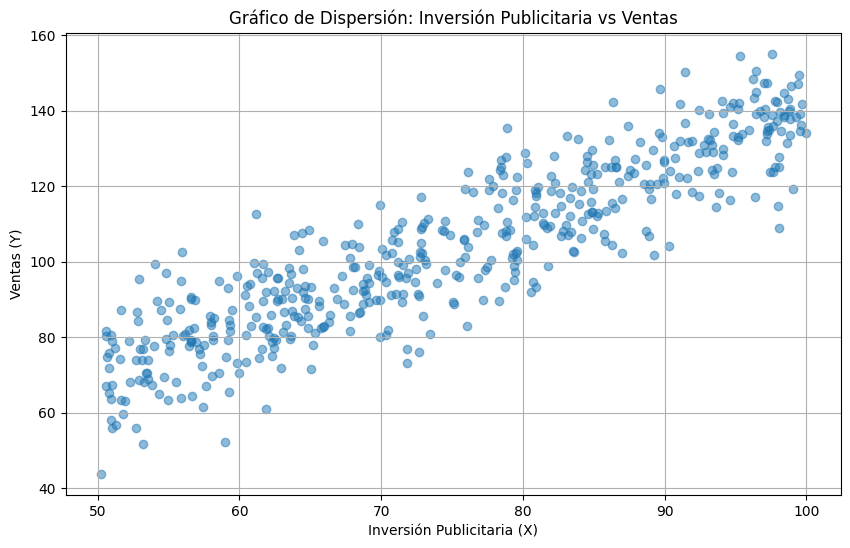

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df_synthetic['X'], df_synthetic['Y'], alpha=0.5)
plt.title('Gráfico de Dispersión: Inversión Publicitaria vs Ventas')
plt.xlabel('Inversión Publicitaria (X)')
plt.ylabel('Ventas (Y)')
plt.grid(True)
plt.show()


## Aplicación de regresión lineal

In [20]:
# Modelo Regresión
slope, intercept, r_value, p_value, std_err = stats.linregress(df_synthetic['X'], df_synthetic['Y'])

# RR
slope, intercept, r_value**2, p_value


(1.405790065210325,
 -1.4344429352647694,
 0.8124593674227075,
 3.969675810873562e-183)

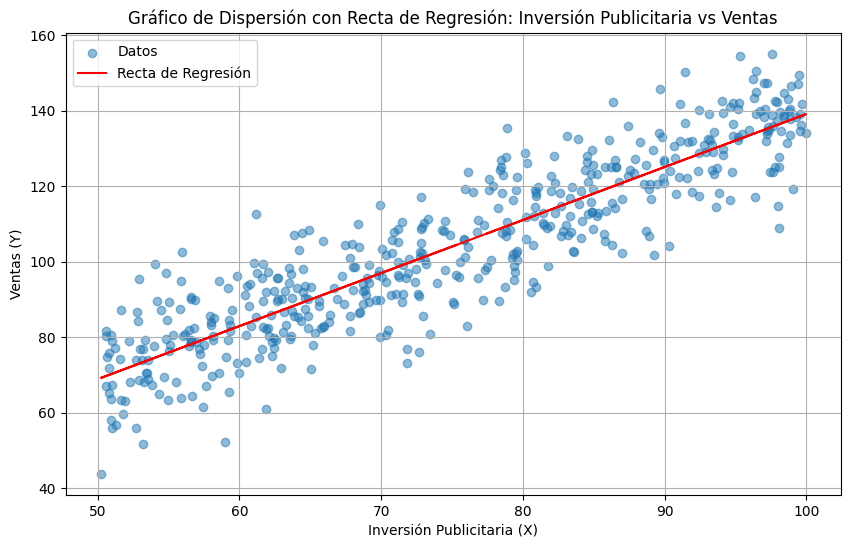

In [21]:
# Crear un gráfico de dispersión con la recta de regresión
plt.figure(figsize=(10, 6))
plt.scatter(df_synthetic['X'], df_synthetic['Y'], alpha=0.5, label='Datos')
plt.plot(df_synthetic['X'], slope * df_synthetic['X'] + intercept, color='red', label='Recta de Regresión')
plt.title('Gráfico de Dispersión con Recta de Regresión: Inversión Publicitaria vs Ventas')
plt.xlabel('Inversión Publicitaria (X)')
plt.ylabel('Ventas (Y)')
plt.legend()
plt.grid(True)
plt.show()


## Intervalos de Confianza y Pruebas de Hipótesis

In [22]:
ci_slope = stats.t.interval(0.95, len(df_synthetic['X'])-1, loc=slope, scale=std_err)

# Error estándar
mean_x = np.mean(df_synthetic['X'])
n = len(df_synthetic['X'])
se_intercept = std_err * np.sqrt(np.sum((df_synthetic['X'] - mean_x)**2) / n)

ci_intercept = stats.t.interval(0.95, len(df_synthetic['X'])-1, loc=intercept, scale=se_intercept)

ci_slope, ci_intercept

((1.3463258894463437, 1.4652542409743063),
 (-2.301027803503648, -0.5678580670258908))

## Verifiación de supuestos - resultados

In [23]:
pendiente_significativa = p_value < 0.05
pendiente_significativa

p_value_intercept = model.pvalues[0]
intercepto_significativo = p_value_intercept < 0.05
intercepto_significativo

print(f"El valor p para la pendiente es {p_value}, lo que indica que la pendiente es significativamente diferente de cero.")
print(f"El valor p para el intercepto es {p_value_intercept}, lo que indica que el intercepto es significativamente diferente de cero.")

El valor p para la pendiente es 3.969675810873562e-183, lo que indica que la pendiente es significativamente diferente de cero.
El valor p para el intercepto es 0.5344320666603304, lo que indica que el intercepto es significativamente diferente de cero.


C:\Users\tarea\AppData\Local\Temp\ipykernel_19800\1063233973.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_intercept = model.pvalues[0]


In [24]:
r_squared = model.rsquared
print(f"Coeficiente de determinación (R^2): {r_squared}")
print(f"El valor de R^2 indica que aproximadamente el {r_squared * 100:.2f}% de la variabilidad en las ventas (Y) se explica por la inversión publicitaria (X).")

Coeficiente de determinación (R^2): 0.8124593674227072
El valor de R^2 indica que aproximadamente el 81.25% de la variabilidad en las ventas (Y) se explica por la inversión publicitaria (X).
